# Binary Sentiment Analysis on IMDb Reviews Dataset  
- **Using a pre-trained Text Embedding Model from TensorFlow Hub**

# Libraries & Modules

In [1]:
# Manage Warnings
import warnings
warnings.filterwarnings("ignore")

# Modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Env. Info
print(f"Python Env : {sys.version}")
print(f"TensorFlow : {tf.__version__}")
print(f"Eager Mode : {tf.executing_eagerly()}")
print(f"TF Hub Ver : {hub.__version__}")

Python Env : 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
TensorFlow : 2.12.0
Eager Mode : True
TF Hub Ver : 0.12.0


# Import Dataset from TensorFlow Datasets

In [2]:
# Generate Training, Validation and Testing Datasets
train_ds, val_ds, test_ds = tfds.load(name="imdb_reviews", 
                                      split=("train[:80%]", "train[80%:]", "test"),
                                      as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEJXS95/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEJXS95/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEJXS95/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Display Sample Reviews & Labels (0-Negative; 1-Positive)
sample_reviews, sample_labels = next(iter(train_ds.batch(4)))
print(sample_reviews, "\n")
print(sample_labels)

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

# Model Definitions

## Text Embedding Model from TensorFlow Hub

In [4]:
# TensorFlow Hub URL for Text Embedding Model
emb_model = "https://tfhub.dev/google/nnlm-en-dim128/2"

# Wrap Model to Keras Layer
hub_layer = hub.KerasLayer(emb_model, input_shape=[], dtype=tf.string, trainable=True)

In [5]:
# Check Functionality
print(hub_layer(sample_reviews[:1]))

tf.Tensor(
[[ 9.01966274e-01 -4.83913347e-03  1.17907055e-01  3.81319046e-01
   6.57222793e-02 -3.01581532e-01  8.90584365e-02 -2.69034863e-01
  -8.51345584e-02  1.08877886e-02 -6.66372627e-02 -3.73063087e-01
  -2.76447266e-01 -1.87254980e-01  5.67507632e-02  9.09779966e-02
  -6.24961555e-02 -3.28687276e-03 -3.08512092e-01  3.78482223e-01
   7.62880966e-02  1.43733576e-01 -1.12897493e-01  9.59761534e-03
  -2.38938913e-01  2.93743908e-02  7.28663057e-02 -2.48727947e-02
  -8.16893280e-02  6.68320432e-02 -5.62225394e-02  2.47078985e-01
   1.17681175e-01  3.17581035e-02  2.65932620e-01 -1.37706831e-01
  -1.50708258e-01 -1.63614675e-01 -1.51269153e-01  2.34616160e-01
  -9.12236273e-02 -4.22684886e-02 -1.01224177e-01 -2.12229744e-01
   6.74503446e-02  1.85163647e-01  3.62982228e-02 -3.50210071e-01
  -5.92576079e-02 -9.54059511e-02 -9.65666175e-02  3.79339904e-02
  -2.36725271e-01  2.67956525e-01 -2.22367734e-01 -1.80506572e-01
  -1.13724798e-01  4.91059460e-02 -1.19525626e-01 -2.27335095e-03

## Model

In [6]:
# Define Model
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________


# Training

In [7]:
# Train Model using Training Dataset
history = model.fit(train_ds.shuffle(5000).batch(512),
                    epochs=5,
                    validation_data=val_ds.batch(512),
                    verbose=1)

Epoch 1/5
40/40 [==============================] - 126s 3s/step - loss: 0.5954 - accuracy: 0.6095 - val_loss: 0.4925 - val_accuracy: 0.7382
Epoch 2/5
40/40 [==============================] - 123s 3s/step - loss: 0.3867 - accuracy: 0.8324 - val_loss: 0.3461 - val_accuracy: 0.8510
Epoch 3/5
40/40 [==============================] - 118s 3s/step - loss: 0.2436 - accuracy: 0.9071 - val_loss: 0.2973 - val_accuracy: 0.8658
Epoch 4/5
40/40 [==============================] - 116s 3s/step - loss: 0.1583 - accuracy: 0.9457 - val_loss: 0.2812 - val_accuracy: 0.8812
Epoch 5/5
40/40 [==============================] - 115s 3s/step - loss: 0.1022 - accuracy: 0.9703 - val_loss: 0.2888 - val_accuracy: 0.8808


# Evaluation

In [8]:
# Evaluate Model using Testing Dataset
test_eval = model.evaluate(test_ds.batch(512), verbose=1)

for name, value in zip(model.metrics_names, test_eval):
    print(f"{name.upper()}: {value:.4f}")

49/49 [==============================] - 30s 612ms/step - loss: 0.3146 - accuracy: 0.8626
LOSS: 0.3146
ACCURACY: 0.8626


In [9]:
history_dict = history.history
display(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

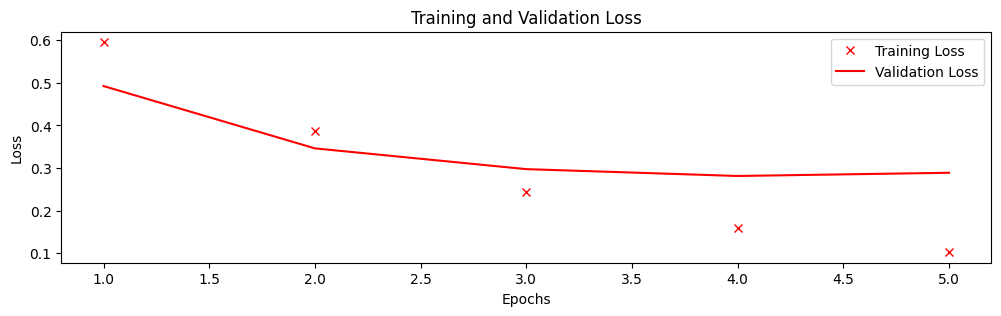

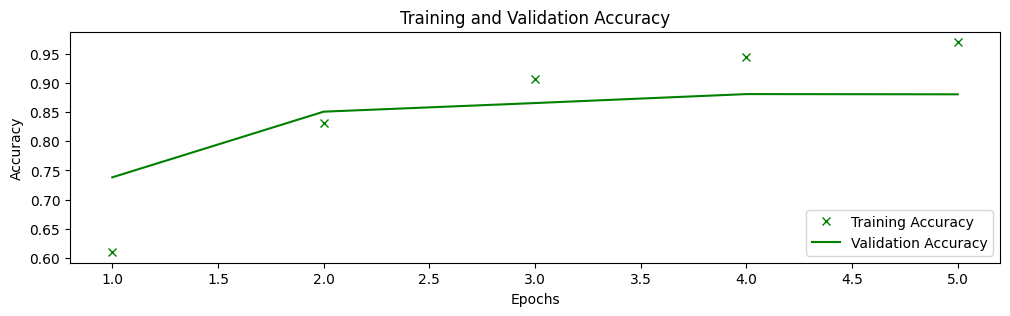

In [10]:
# Define Visualization Data
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Define Epochs Range
epochs = range(1, len(acc) + 1)

# Plot Losses
plt.figure(figsize=(12,3))
plt.plot(epochs, loss, 'rx', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracies
plt.figure(figsize=(12,3))
plt.plot(epochs, acc, 'gx', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Exporting Model

In [11]:
# Define Model for Exporting
export_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Activation("sigmoid")
])

# Compile Model
export_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                     optimizer="adam", 
                     metrics=['accuracy'])

# Test Accuracy on Test Data
loss, accuracy = export_model.evaluate(test_ds.batch(512))
print(f"LOSS     : {round(loss, 2)}")
print(f"ACCURACY : {round(accuracy*100, 2)} %")

49/49 [==============================] - 30s 608ms/step - loss: 0.3146 - accuracy: 0.8684
LOSS     : 0.31
ACCURACY : 86.84 %


# Inference of Exported Model on Fresh Data

In [12]:
# Example Fresh Data
examples = [
    "The movie was great!",
    "The movie was okay.",
    "The movie was terrible...",
    "I thought the movie was enlightening, but my friend thought it as misleading.",
    "I thought the movie was misleading, but my friend thought it as okay."
]

# Raw Predictions
preds = export_model.predict(examples)
print("-"*36)
print("Raw Predictions:")
print("-"*36)
display(preds)

# Predictions as Labels
print("-"*36)
print("Predictions as Labels:")
print("-"*36)
pred_labels = np.where(preds > 0.5, 1, 0)
display(pred_labels)

1/1 [==============================] - 1s 729ms/step
------------------------------------
Raw Predictions:
------------------------------------


array([[0.6735228 ],
       [0.22910967],
       [0.4214071 ],
       [0.8296421 ],
       [0.88063586]], dtype=float32)

------------------------------------
Predictions as Labels:
------------------------------------


array([[1],
       [0],
       [0],
       [1],
       [1]])